## 1) Importing the libraries for the project

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
from sklearn import datasets

wine = datasets.load_wine()

# Converting in dataframe
# Target column is the wine classes

wine_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
wine_df['class'] = wine['target']
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2) Exploratory Data Analysis

In [81]:
#Verifichiamo che tutte le feature abbiamo un dtype coerente
#Verifichiamo la presenza di eventuali dati nulli

wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [82]:
#Con il metodo describe andiamo a vedere se ci sono eventuali outlier che risaltano a colpo d'occhio
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<Axes: >

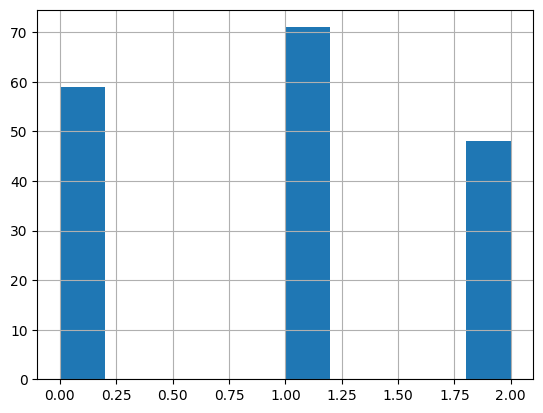

In [83]:
wine_df['class'].hist()

#Abbiamo tre classi ben distribuite, tutto sommato possiamo considerare il Dataset bilanciato

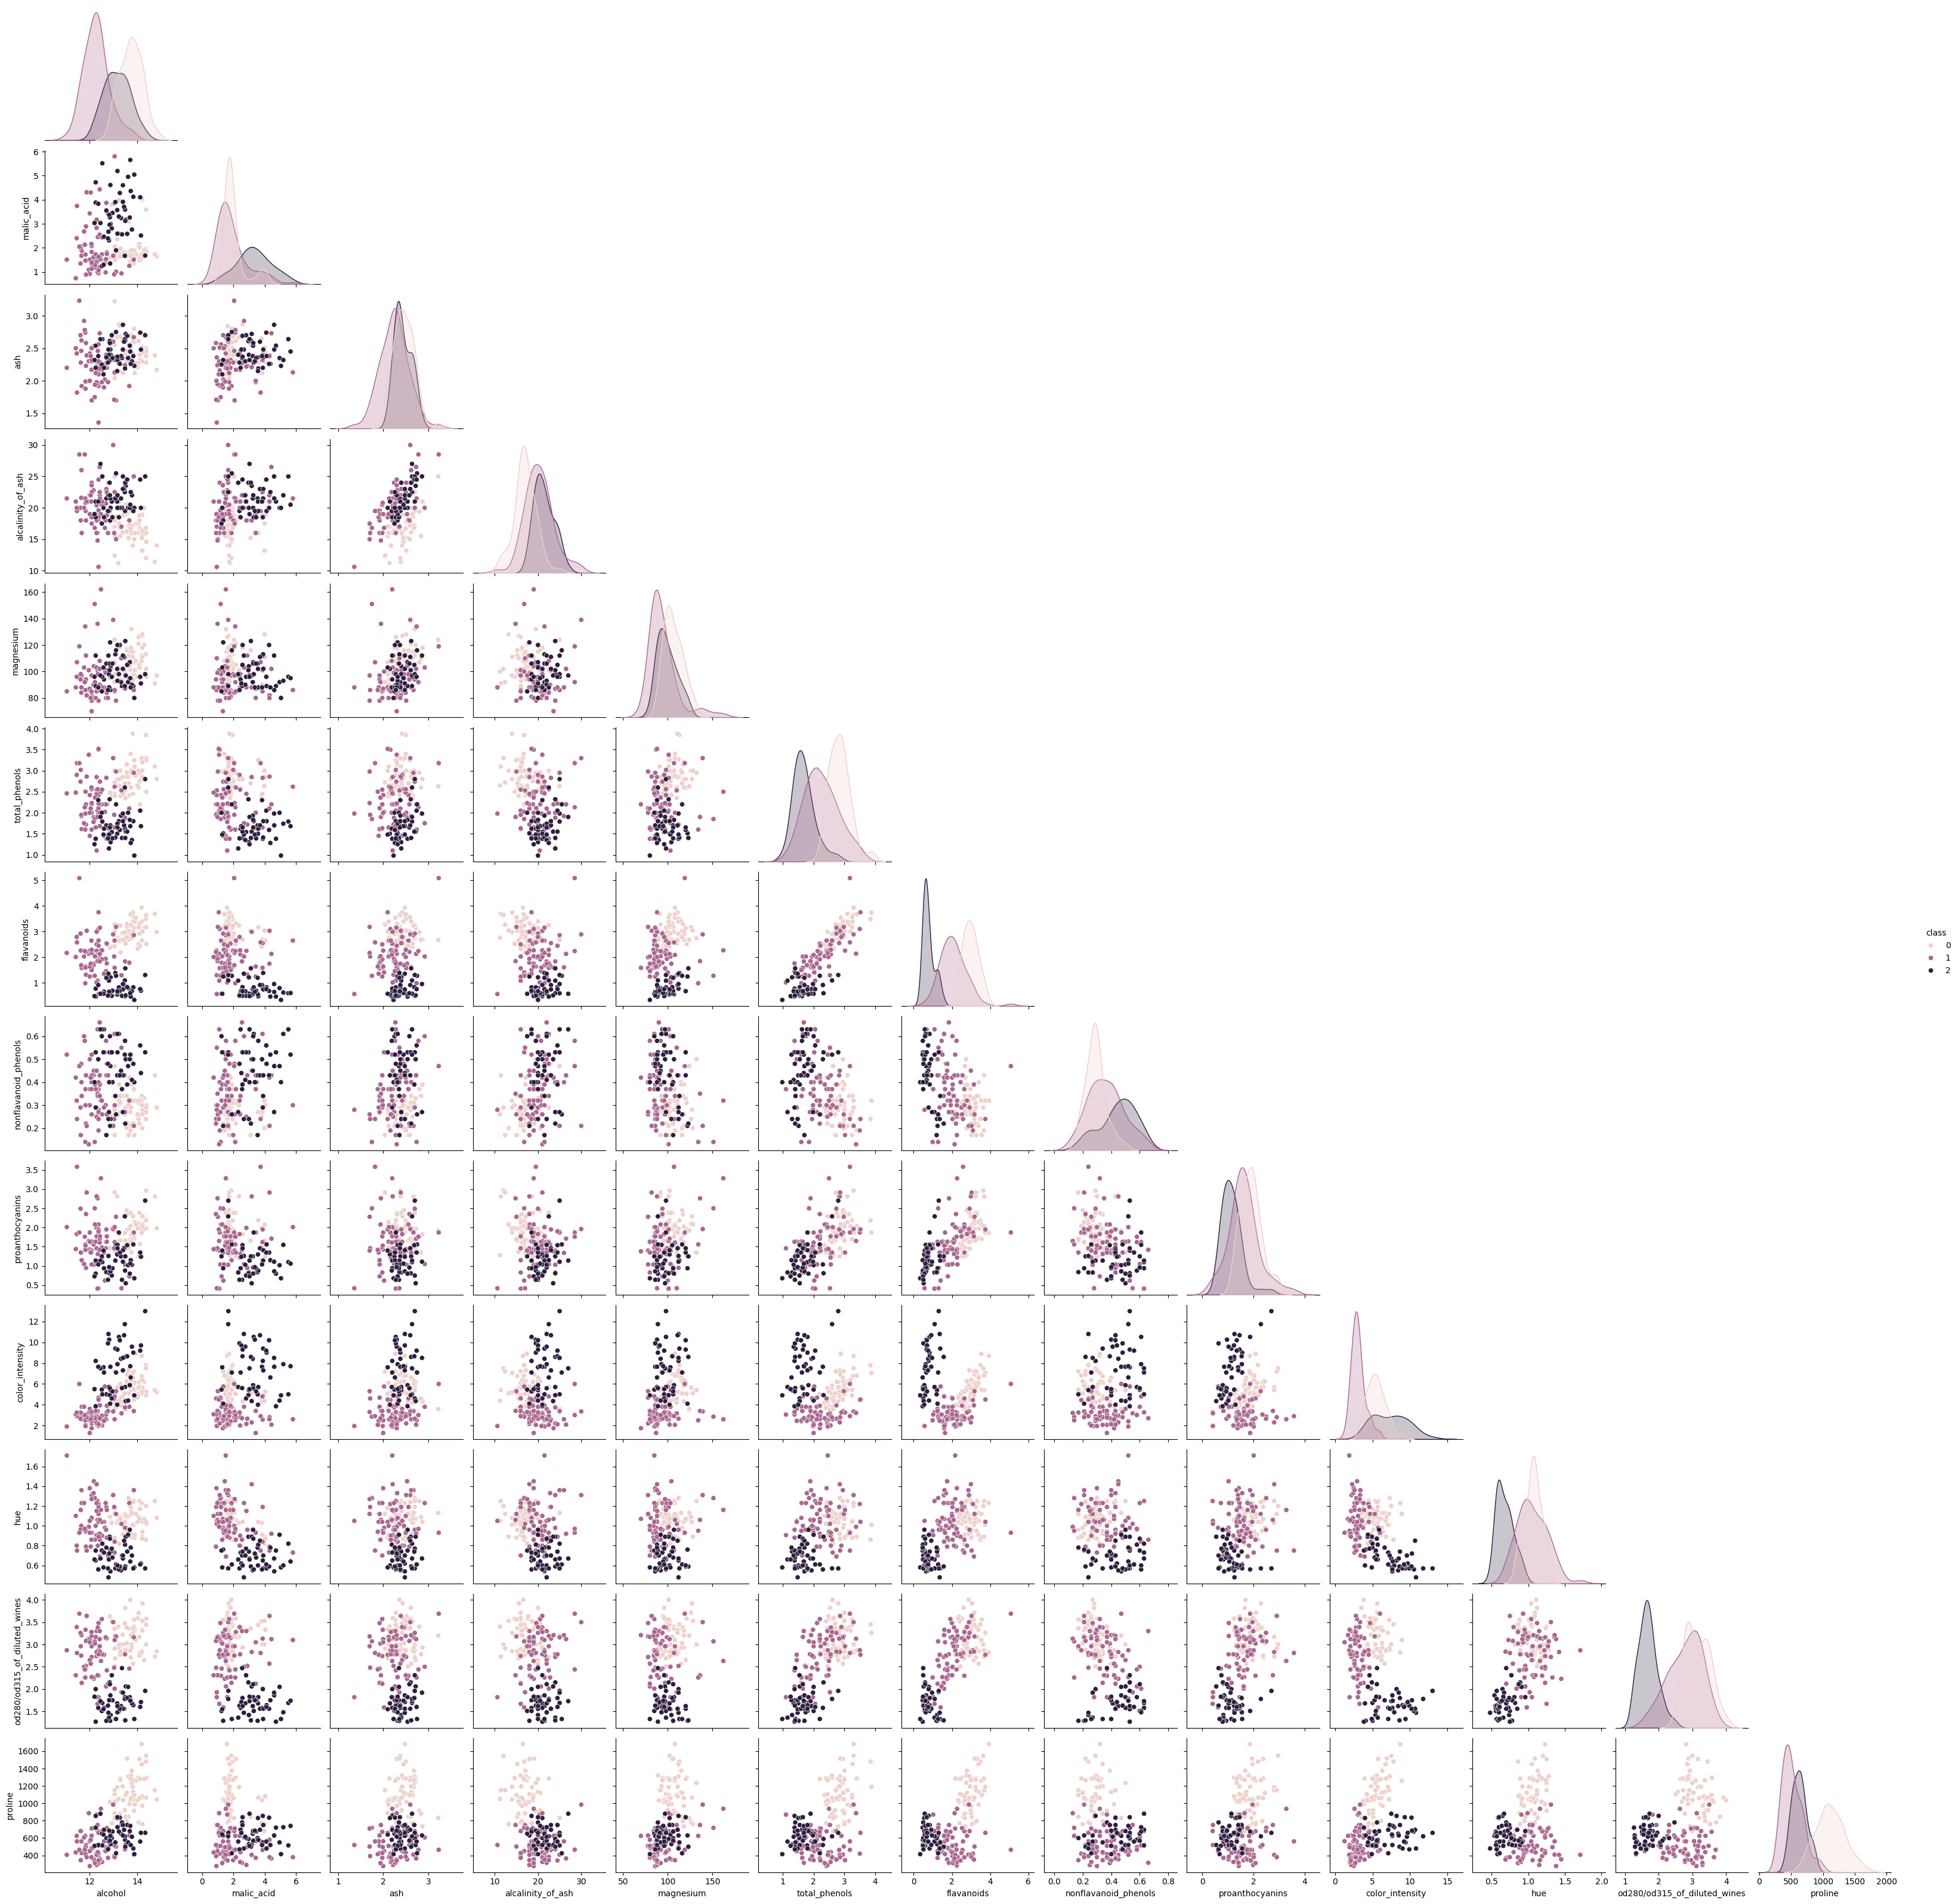

In [84]:
sns.pairplot(wine_df, corner=True ,hue='class');

In [85]:
# Faccio lo split
from sklearn.model_selection import train_test_split

X = wine_df.drop(['class'], axis=1)
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

## 3) Neural Network Model

In [116]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [117]:
#Faccio lo scaling dei dati
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
#Definiamo la rete neurale con modello softmax
def get_model():
  model = Sequential()
  model.add(InputLayer(shape=(X_train.shape[1],)))                  #Strato di input con il numero di neuroni pari al numero di feature
  model.add(Dense(10, activation='relu', name='hidden_layer_1'))
  model.add(Dense(10, activation='relu', name='hidden_layer_2'))
  model.add(Dense(3, activation='softmax', name='output_layer'))    #Strato di output con 3 neuroni di output e softmax
  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [119]:
model = get_model()
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
#Definiamo una classe di callback personalizzata per fermare l'addestramento quando la validation accuracy raggiunge il 90%

class EarlyStopper(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs,**kwargs):
    if logs['val_accuracy']>0.9:
      print('Epoca', epoch)
      print('Validation Accuracy', logs['val_accuracy'])
      print('Stop Training since validation accuracy >0.9')
      self.model.stop_training=True

In [121]:
earlystopper = EarlyStopper()

history = model.fit(X_train, y_train, epochs=100, verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[earlystopper])

Epoca 71
Validation Accuracy 0.9166666865348816
Stop Training since validation accuracy >0.9


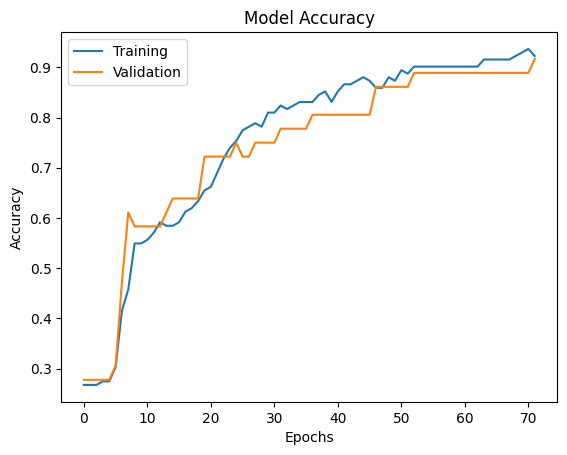

In [122]:
#Plottiamo i risultati
plt.plot(history.history['accuracy'], label='Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()

In [123]:
#Testiamo il modello sul test

from sklearn.metrics import confusion_matrix

y_pred = []

for lists in model.predict(X_test):
  list_1 = list(lists)
  y_pred.append(list_1.index(max(list_1)))

matrix = confusion_matrix(y_test, y_pred)
matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[13,  0,  0],
       [ 1, 10,  2],
       [ 0,  0, 10]])

In [124]:
#Metriche

class_metrics = []

for i in range(3):

  if i==0:
    a = 1
    b = 2
  elif i==1:
    a = 0
    b = 2
  else:
    a = 0
    b = 1

  class_sample = sum(matrix[i])
  class_TP = matrix[i][i]                                         #True Positive
  class_FP = matrix[a][i] + matrix[b][i]                          #False Positive
  class_FN = matrix[i][a] + matrix[i][b]                          #False Negative
  class_TN = sum(sum(matrix)) - class_TP + class_FP + class_FN    #True Negative
  class_accuracy = (class_TP + class_TN)/(class_TP + class_TN + class_FP + class_FN)
  class_recall = class_TP/(class_TP + class_FP)
  class_precision = class_TP/(class_TP + class_FN)

  class_metrics.append(class_sample)
  class_metrics.append(class_accuracy)
  class_metrics.append(class_recall)
  class_metrics.append(class_precision)

print('Class 0:', 'sample: ', class_metrics[0], 'accuracy: ', round(class_metrics[1],2), 'recall: ', round(class_metrics[2],2), 'precision: ', round(class_metrics[3],2))
print('Class 1:', 'sample: ', class_metrics[4], 'accuracy: ', round(class_metrics[5],2), 'recall: ', round(class_metrics[6],2), 'precision: ', round(class_metrics[7],2))
print('Class 2:', 'sample: ', class_metrics[8], 'accuracy: ', round(class_metrics[9],2), 'recall: ', round(class_metrics[10],2), 'precision: ', round(class_metrics[11],2))


Class 0: sample:  13 accuracy:  0.97 recall:  0.93 precision:  1.0
Class 1: sample:  13 accuracy:  0.93 recall:  1.0 precision:  0.77
Class 2: sample:  10 accuracy:  0.95 recall:  0.83 precision:  1.0


## 3) Logistic Regression Model

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [126]:
#Fitto modello di regressione logistica con gli iperparametri standard
lr = LogisticRegression(max_iter=5000, multi_class='auto')

lr = lr.fit(X_train, y_train)

In [127]:
print('Accuracy on train', lr.score(X_train, y_train))
print('Accuracy on test', lr.score(X_test, y_test))

#Abbiamo già un buon modello ma soffre leggermente di overfitting

Accuracy on train 0.9859154929577465
Accuracy on test 1.0


#### Regularization

In [128]:
#Facciamo lo scaling delle feature
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [131]:
#Regularized Logistic Regression
parameters = {'C': np.linspace(0.1,2,20),
              'penalty':['l1', 'l2']}

gridsearch = GridSearchCV(LogisticRegression(solver='saga', max_iter=2000), parameters)
gridsearch.fit(X_train_std, y_train)
gridsearch.best_params_

{'C': 0.4, 'penalty': 'l2'}

In [132]:
lr_tuned = LogisticRegression(max_iter=2000, **gridsearch.best_params_)

lr_tuned = lr_tuned.fit(X_train_std, y_train)

print('Accuracy on train', lr_tuned.score(X_train_std, y_train))
print('Accuracy on test', lr_tuned.score(X_test_std, y_test))

#Attraverso la regolarizzazione abbiamo ottenuto un modello migliore perchè più performante sul test set

Accuracy on train 1.0
Accuracy on test 0.9722222222222222


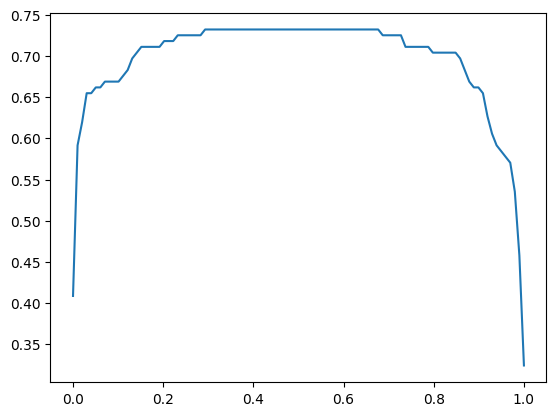

In [133]:
#Tuning the treshold
f1 = []

thresholds = np.linspace(0,1,100)

for thresh in thresholds:
    y_pred = (lr_tuned.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred, average='micro'))

sns.lineplot(x=thresholds, y=f1);

## 4) Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)

print('Train Accuracy', rf.score(X_train, y_train))
print('Test Accuracy', rf.score(X_test, y_test))

#Possiamo vedere come abbiamo un alto overfitting usando gli iperparametri di default

Train Accuracy 1.0
Test Accuracy 0.9722222222222222


In [103]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=2024, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, 'sqrt'],
    'max_samples': [None, 0.3, 0.5, 0.9],
    'max_depth': np.arange(start=3, stop=11, step=2),
    'min_samples_leaf': [2,10,20,100]}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter=100,
    scoring='accuracy')

grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 400,
 'min_samples_leaf': 10,
 'max_samples': 0.3,
 'max_features': 'sqrt',
 'max_depth': 3}

In [134]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=2024, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=250, stop=450, step=10),
    'max_features': ['sqrt'],
    'max_samples': [0.2, 0.3, 0.4],
    'max_depth': [2,3,4],
    'min_samples_leaf': [8,10,12]}

grid = GridSearchCV(
    rf,
    params,
    scoring='accuracy')

grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 2,
 'max_features': 'sqrt',
 'max_samples': 0.3,
 'min_samples_leaf': 10,
 'n_estimators': 300}

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf_tuned = RandomForestClassifier(random_state=2024, **rf_best_params)
rf_tuned.fit(X_train, y_train)

print('Train Accuracy', rf_tuned.score(X_train, y_train))
print('Test Accuracy', rf_tuned.score(X_test, y_test))


Train Accuracy 0.9788732394366197
Test Accuracy 0.9722222222222222
